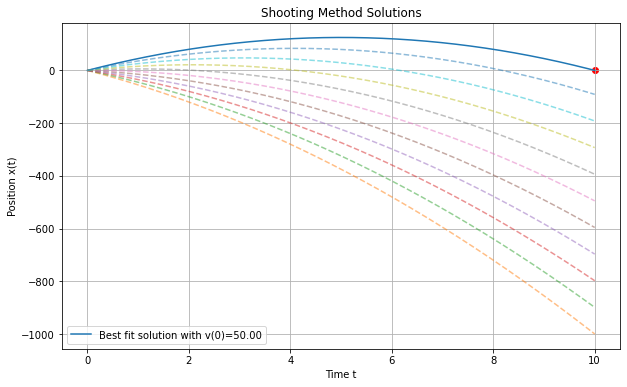

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, x0, t0, tf, n):
    h = (tf - t0) / float(n)
    t = np.linspace(t0, tf, n+1)
    x = np.zeros((n+1, len(x0)))
    x[0] = x0
    for i in range(n):
        k1 = h * np.array(f(t[i], x[i]))
        k2 = h * np.array(f(t[i] + 0.5 * h, x[i] + 0.5 * k1))
        k3 = h * np.array(f(t[i] + 0.5 * h, x[i] + 0.5 * k2))
        k4 = h * np.array(f(t[i] + h, x[i] + k3))
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, x

def model(t, y):
    g = 10
    dydt = np.zeros_like(y)
    dydt[0] = y[1]  # dx/dt = v
    dydt[1] = -g  # dv/dt = -g
    return dydt

# Boundary conditions and parameters
t0 = 0
tf = 10
x0 = 0
n = 1000

# Try different initial velocities
initial_velocities = np.linspace(-50, 50, 100)
final_positions = []

for v in initial_velocities:
    _, sol = rk4(lambda t, y: model(t, y), [x0, v], t0, tf, n)
    final_positions.append(sol[-1, 0])

# Find the initial velocity that makes x(tf) closest to 0
idx = np.argmin(np.abs(final_positions))
best_v = initial_velocities[idx]

# Solve with the best initial velocity
t, sol = rk4(lambda t, y: model(t, y), [x0, best_v], t0, tf, n)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, sol[:, 0], label=f'Best fit solution with v(0)={best_v:.2f}')
plt.scatter([tf], [0], color='red')  # Target boundary condition at tf
for v in initial_velocities[::10]:  # plot only some candidate solutions for clarity
    _, temp_sol = rk4(lambda t, y: model(t, y), [x0, v], t0, tf, n)
    plt.plot(t, temp_sol[:, 0], linestyle='--', alpha=0.5)
plt.title('Shooting Method Solutions')
plt.xlabel('Time t')
plt.ylabel('Position x(t)')
plt.legend()
plt.grid(True)
plt.show()